# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from functools import reduce

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceuticals_df= pd.merge(study_results,mouse_metadata,how='left', on=['Mouse ID','Mouse ID'])

# Display the data table for preview
pymaceuticals_df.set_index('Mouse ID',inplace=True)
pymaceuticals_df.head()


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.0,0,Capomulin,Female,9,22
f932,0,45.0,0,Ketapril,Male,15,29
g107,0,45.0,0,Ketapril,Female,2,29
a457,0,45.0,0,Ketapril,Female,11,30
c819,0,45.0,0,Ketapril,Male,21,25


In [43]:
# Checking the number of mice.
pymaceuticals_df= pymaceuticals_df.reset_index()
Mouse_count= pymaceuticals_df['Mouse ID'].unique()
Mouse_count= len(Mouse_count)
Mouse_count

249

In [44]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates=pymaceuticals_df[pymaceuticals_df.duplicated(subset=['Mouse ID','Timepoint'])]
duplicates=duplicates['Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [45]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_MouseID= pymaceuticals_df[pymaceuticals_df.duplicated(subset=['Mouse ID','Timepoint'])]
duplicate_MouseID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [46]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=pymaceuticals_df[pymaceuticals_df['Mouse ID']!= duplicates[0]]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [47]:
# Checking the number of mice in the clean DataFrame.
Mouse_count_clean_df=clean_df['Mouse ID'].unique()
Mouse_count_clean_df = len(Mouse_count_clean_df)
Mouse_count_clean_df

248

## Summary Statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summ_stat= clean_df.describe()
summ_stat

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, 
mean_drug= clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().to_frame().rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'})
mean_drug
# median, 
median_drug= clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().to_frame().rename(columns={'Tumor Volume (mm3)':'Median Tumor Volume'})
median_drug
# variance, 
variance_drug=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().to_frame().rename(columns={'Tumor Volume (mm3)':'Variance Tumor Volume'})
variance_drug
# standard deviation, 
std_drug= clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().to_frame().rename(columns={'Tumor Volume (mm3)':'Standar Dev Tumor Volume'})
std_drug
# and SEM of the tumor volume. 
sem_drug = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().to_frame().rename(columns={'Tumor Volume (mm3)':'SEM Tumor Volume'})
sem_drug
# Assemble the resulting series into a single summary DataFrame.
data_frames=[mean_drug,median_drug,variance_drug,std_drug,sem_drug]
summ_stat_df= reduce(lambda left,right: pd.merge(left,right,on=['Drug Regimen'],how='outer'),data_frames)
summ_stat_df



,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standar Dev Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [49]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summ_stat_one_method=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
summ_stat_one_method
# Using the aggregation method, produce the same summary statistics in a single line
summ_stat_one_method=clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std']})
summ_stat_one_method['Tumor Volume (mm3)','sem'] = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summ_stat_one_method

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [50]:

num_rows= clean_df.groupby('Drug Regimen')[['Mouse ID','Timepoint']].size().sort_values(ascending=False).to_frame().rename(columns={0:'Docs'})
num_rows= num_rows.reset_index()
num_rows

,Drug Regimen,Docs
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Ceftamin,178
8,Infubinol,178
9,Propriva,148


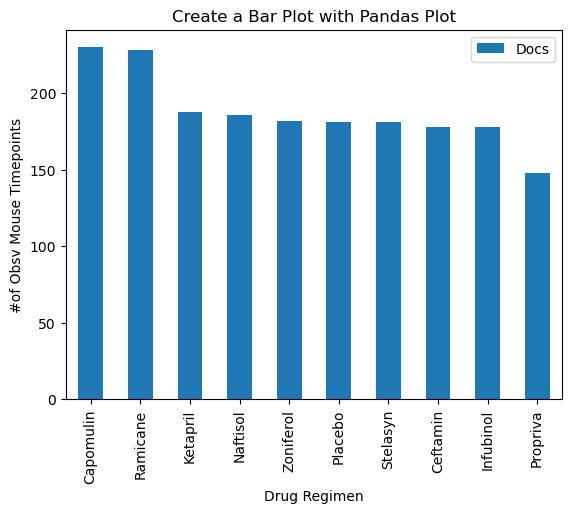

In [51]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
num_rows.plot(kind='bar',x='Drug Regimen',y='Docs')
plt.xlabel('Drug Regimen')
plt.ylabel('#of Obsv Mouse Timepoints')
plt.title('Create a Bar Plot with Pandas Plot')
plt.show()





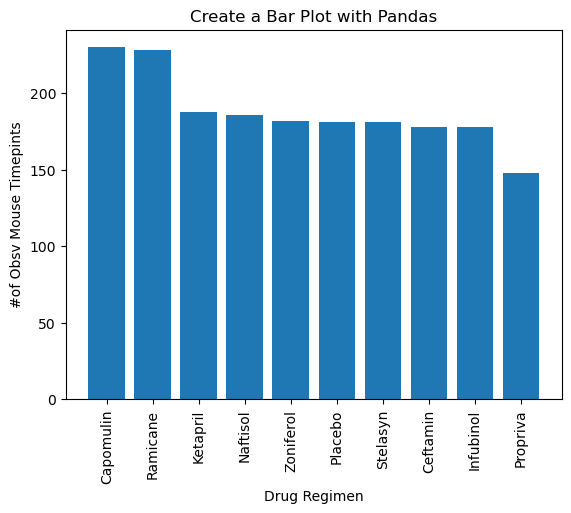

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=np.arange(len(num_rows))
xticks_label = [values for values in x_axis]

plt.bar(x_axis,num_rows['Docs'])
plt.xlabel('Drug Regimen')
plt.ylabel('#of Obsv Mouse Timepints')
plt.xticks(xticks_label,num_rows['Drug Regimen'],rotation="vertical")
plt.title('Create a Bar Plot with Pandas')

plt.show()

In [53]:
#create the data frame
sex_df=clean_df.groupby('Sex').size().to_frame().rename(columns={0:'Docs'})
sex_df= sex_df.reset_index()

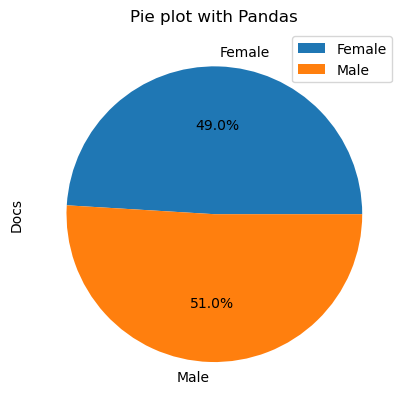

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df.plot(kind='pie', y='Docs',labels=sex_df['Sex'],autopct='%1.1f%%')
plt.title('Pie plot with Pandas')
plt.show()

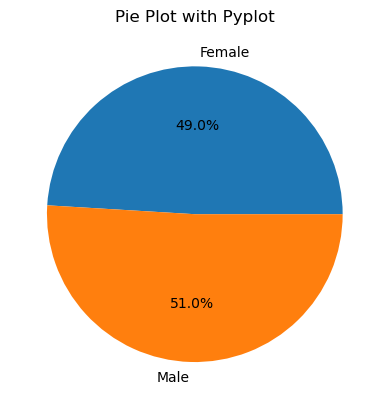

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_df['Docs'],labels=sex_df['Sex'],autopct='%1.1f%%')
plt.title('Pie Plot with Pyplot')
plt.show()

## Quartiles, Outliers and Boxplots

In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin,
# Ramicane, 
#Infubinol, 
#and Ceftamin
drug_regimen=['Capomulin','Ramicane','Infubinol','Ceftamin']
filtered_df_by_drug_regimen= clean_df[clean_df['Drug Regimen'].isin(drug_regimen)]
filtered_df=filtered_df_by_drug_regimen.groupby(['Mouse ID','Drug Regimen'])['Tumor Volume (mm3)'].last().to_frame()
filtered_df=filtered_df.rename(columns={'Tumor Volume (mm3)':'Last Tumor Volume'})
filtered_df

# Start by getting the last (greatest) timepoint for each mouse
timepoint_max= filtered_df_by_drug_regimen.groupby(['Mouse ID','Drug Regimen'])['Timepoint'].max().to_frame().rename(columns={'Timepoint':'Max_Timepoint'})
timepoint_max
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df=filtered_df.merge(timepoint_max,how='left',on=['Mouse ID','Drug Regimen'])
tumor_volume_df


,,Last Tumor Volume,Max_Timepoint
Mouse ID,Drug Regimen,,
a203,Infubinol,67.973419,45
a251,Infubinol,65.525743,45
a275,Ceftamin,62.999356,45
a411,Ramicane,38.407618,45
a444,Ramicane,43.047543,45
...,...,...,...
y769,Ceftamin,68.594745,45
y793,Capomulin,31.896238,45
y865,Ceftamin,64.729837,45


In [57]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outliers = {}
    
    # Locate the rows which contain mice on each drug and get the tumor volumes


for treatment in drug_regimen:
    data_frame_filtered=filtered_df_by_drug_regimen[filtered_df_by_drug_regimen['Drug Regimen']==treatment]
    tumor_volume= data_frame_filtered['Tumor Volume (mm3)']
    # add subset 
    
    tumor_vol_data.append(tumor_volume)
    #print(tumor_vol_data)

    # iqr and quartiles
    quartiles= tumor_volume.quantile([0.25,0.75])
    lower= quartiles[0.25]
    upper= quartiles[0.75]
    iqr=upper - lower
        
    # Determine outliers using upper and lower bounds
    lower_bound=lower -1.5*iqr
    upper_bound=upper +1.5*iqr
    #print(lower_bound)
    #print(upper_bound)
    lim_outliers=data_frame_filtered[(tumor_volume<lower_bound) | (tumor_volume>upper_bound)]
    outliers[treatment]=lim_outliers['Tumor Volume (mm3)']

#outliers
#print(outliers)

for treatment,lim_outliers in outliers.items():
    print(f'{treatment} has a potential outliner:')
    if not lim_outliers.empty:
        print(lim_outliers)
    else:
       print('Name: Tumor Volume (mm3), dtype: float64')

    

    







Capomulin has a potential outliner:
1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane has a potential outliner:
1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol has a potential outliner:
Name: Tumor Volume (mm3), dtype: float64
Ceftamin has a potential outliner:
Name: Tumor Volume (mm3), dtype: float64


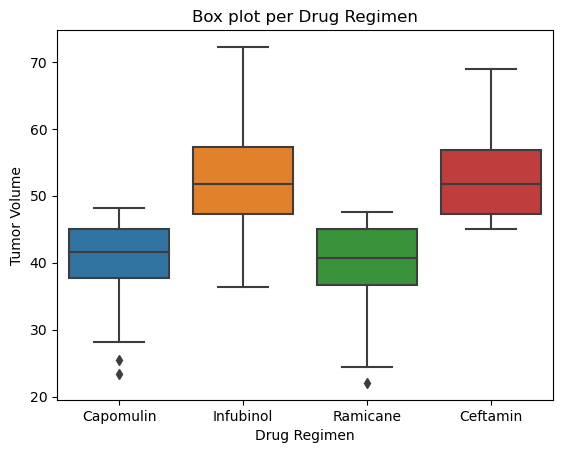

In [58]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#to do an each boxplot for each regimen, I will import seaborn
import seaborn as sns

filtered_df_by_drug_regimen

sns.boxplot(x='Drug Regimen',y='Tumor Volume (mm3)',data=filtered_df_by_drug_regimen)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume')
plt.title('Box plot per Drug Regimen')
plt.show()




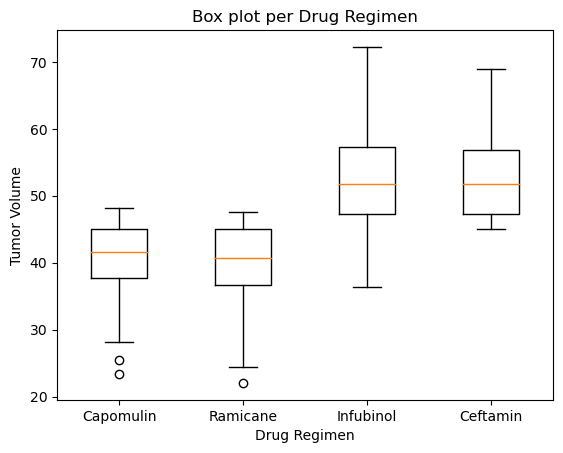

In [59]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#to do an each boxplot for each regimen, to do it with matplotlib
data_plot = {}

data_plot={treatment:filtered_df_by_drug_regimen[filtered_df_by_drug_regimen['Drug Regimen']==treatment]['Tumor Volume (mm3)'] for treatment in drug_regimen}
#for treatment in drug_regimen:
#    data_plot.append(filtered_df_by_drug_regimen[filtered_df_by_drug_regimen['Drug Regimen']==treatment]['Tumor Volume (mm3)'])

fig, ax = plt.subplots()
ax.boxplot(data_plot.values(),
           labels=data_plot.keys())
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume')
plt.title('Box plot per Drug Regimen')
plt.show()

## Line and Scatter Plots

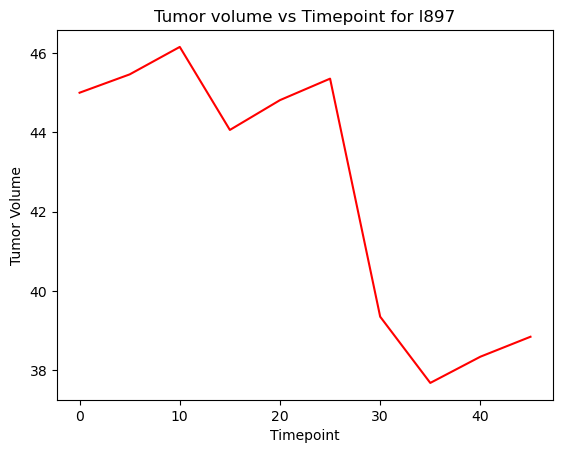

In [60]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
import random

random_index=random.randint(0,len(clean_df['Mouse ID'])-1)
single_mouse = clean_df['Mouse ID'].iloc[random_index]
#print(single_mouse)
capomulin_df=clean_df[clean_df['Drug Regimen']=='Capomulin']
capomulin_df=clean_df[clean_df['Mouse ID']==single_mouse]
capomulin_df
plt.plot(capomulin_df['Timepoint'],capomulin_df['Tumor Volume (mm3)'],color='r')
plt.title(f'Tumor volume vs Timepoint for {single_mouse}')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()


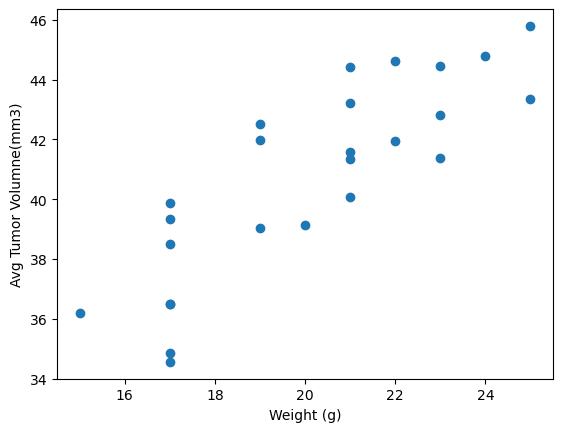

In [61]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df=clean_df[clean_df['Drug Regimen']=='Capomulin']
capomulin_df=capomulin_df.groupby(['Weight (g)','Mouse ID'])['Tumor Volume (mm3)'].mean().reset_index()
x=capomulin_df['Weight (g)']
y=capomulin_df['Tumor Volume (mm3)']
plt.scatter(x,y)
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volumne(mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.841936


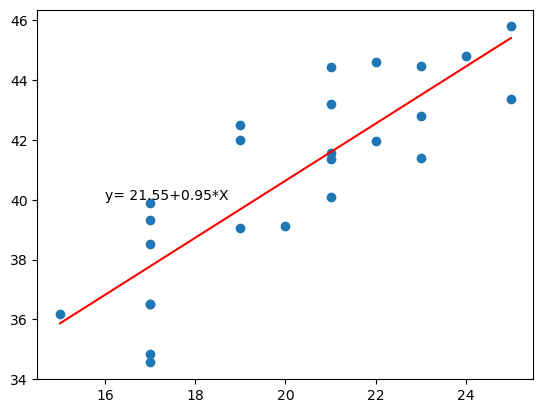

In [233]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_coefficient= np.corrcoef(x,y)[0,1]
print(f'The correlation between mouse weight and the average tumor volume is {(corr_coefficient):.6f}')
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(x,y)
predictions=intercept + slope * pd.Series(x)
predictions
plt.scatter(x,y)
plt.plot(x,predictions,color='r')
plt.annotate(f'y= {round(intercept,2)}+{round(slope,2)}*X',(16,40))
plt.show()